In [2]:
import pandas as pd
import numpy as np
FOCAL_LENGTH = 539.1304347826087

In [3]:
showfun = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/showfun/showfun_qr_task5.csv'
#open csv without header
QR_Data = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/barcode_coordinate.csv'
df = pd.read_csv(showfun, names = ['timestamp','barcodeData','c_x','c_y','w','h','perceived_distance','perceived_direction'])
df

,timestamp,barcodeData,c_x,c_y,w,h,perceived_distance,perceived_direction
0,1.699624e+09,32,240,57,77,73,84.931507,23.996777
1,1.699624e+09,21,-141,58,74,74,83.783784,-14.656418
2,1.699624e+09,27,87,56,73,72,86.111111,9.166850
3,1.699624e+09,25,-62,57,72,72,86.111111,-6.560196
4,1.699624e+09,31,164,57,76,72,86.111111,16.919423
...,...,...,...,...,...,...,...,...
1060,1.699625e+09,27,87,56,73,72,86.111111,9.166850
1061,1.699625e+09,26,12,56,71,72,86.111111,1.275083
1062,1.699625e+09,21,-141,58,74,74,83.783784,-14.656418
1063,1.699625e+09,31,163,57,75,72,86.111111,16.822099


In [4]:
qr = pd.read_csv(QR_Data, names = ['barcodeData','s_x','s_y'])
qr

,barcodeData,s_x,s_y
0,32,0,96.0
1,21,0,35.0
2,27,0,71.0
3,25,0,47.0
4,31,0,84.0
5,26,0,59.5
6,20,0,22.5


Add true position of the qrcode in df

In [5]:
df = df.merge(qr, on='barcodeData', how='left')
df

,timestamp,barcodeData,c_x,c_y,w,h,perceived_distance,perceived_direction,s_x,s_y
0,1.699624e+09,32,240,57,77,73,84.931507,23.996777,0,96.0
1,1.699624e+09,21,-141,58,74,74,83.783784,-14.656418,0,35.0
2,1.699624e+09,27,87,56,73,72,86.111111,9.166850,0,71.0
3,1.699624e+09,25,-62,57,72,72,86.111111,-6.560196,0,47.0
4,1.699624e+09,31,164,57,76,72,86.111111,16.919423,0,84.0
...,...,...,...,...,...,...,...,...,...,...
1060,1.699625e+09,27,87,56,73,72,86.111111,9.166850,0,71.0
1061,1.699625e+09,26,12,56,71,72,86.111111,1.275083,0,59.5
1062,1.699625e+09,21,-141,58,74,74,83.783784,-14.656418,0,35.0
1063,1.699625e+09,31,163,57,75,72,86.111111,16.822099,0,84.0


In [6]:
#dispplay all columsn with barcodeData = 32
df[df['barcodeData'] == 32]

,timestamp,barcodeData,c_x,c_y,w,h,perceived_distance,perceived_direction,s_x,s_y
0,1.699624e+09,32,240,57,77,73,84.931507,23.996777,0,96.0
7,1.699624e+09,32,240,58,77,74,83.783784,23.996777,0,96.0
14,1.699624e+09,32,240,57,77,73,84.931507,23.996777,0,96.0
21,1.699624e+09,32,240,57,77,73,84.931507,23.996777,0,96.0
27,1.699624e+09,32,240,57,78,73,84.931507,23.996777,0,96.0
...,...,...,...,...,...,...,...,...,...,...
1034,1.699625e+09,32,240,57,78,73,84.931507,23.996777,0,96.0
1038,1.699625e+09,32,240,57,77,73,84.931507,23.996777,0,96.0
1045,1.699625e+09,32,240,57,78,73,84.931507,23.996777,0,96.0
1052,1.699625e+09,32,240,57,77,73,84.931507,23.996777,0,96.0


In [7]:
# fix the distance measurement
QR_width = 11.5
df['perceived_distance'] = (QR_width * FOCAL_LENGTH) / df['h']
df['perceived_direction'] = np.arctan2(df['c_x'], FOCAL_LENGTH) * 180 / np.pi


In [8]:
df[df['barcodeData'] == 21]

,timestamp,barcodeData,c_x,c_y,w,h,perceived_distance,perceived_direction,s_x,s_y
1,1.699624e+09,21,-141,58,74,74,83.783784,-14.656418,0,35.0
9,1.699624e+09,21,-141,58,74,74,83.783784,-14.656418,0,35.0
16,1.699624e+09,21,-141,58,74,73,84.931507,-14.656418,0,35.0
29,1.699624e+09,21,-141,58,74,74,83.783784,-14.656418,0,35.0
39,1.699624e+09,21,-141,58,74,74,83.783784,-14.656418,0,35.0
...,...,...,...,...,...,...,...,...,...,...
1036,1.699625e+09,21,-141,58,74,74,83.783784,-14.656418,0,35.0
1043,1.699625e+09,21,-141,58,74,74,83.783784,-14.656418,0,35.0
1047,1.699625e+09,21,-141,58,74,74,83.783784,-14.656418,0,35.0
1055,1.699625e+09,21,-141,58,74,74,83.783784,-14.656418,0,35.0


In [9]:
#list the number of unique Barcodes
df['barcodeData'].unique()

array([32, 21, 27, 25, 31, 26, 20])

In [21]:
def partialDerivative(s_x,s_y,p_x,p_y,psi):
    d_x  = (p_x - s_x) / np.sqrt((s_x - p_x)**2 + (s_y - p_y)**2)
    d_y  = (p_y - s_y) / np.sqrt((s_x - p_x)**2 + (s_y - p_y)**2)
    d_phi = 0

    dphi_x = -1*(p_y - s_y) / ((s_x - p_x)**2 + (s_y - p_y)**2)
    dphi_y = -1*(s_x - p_x) / ((s_x - p_x)**2 + (s_y - p_y)**2)
    dphi_phi = -1

    #return as 2d array
    # return np.array([[d_x,d_y,d_phi],[dphi_x,dphi_y,dphi_phi]])
    return d_x,d_y,d_phi,dphi_x,dphi_y,dphi_phi

def getFunction(s_x,s_y,p_x,p_y,psi):
    d = np.sqrt((s_x - p_x)**2 + (s_y - p_y)**2)
    phi = np.arctan2(s_y-p_y,s_x-p_x) - psi
    #return as 2d array
    return d,phi

In [24]:
#initialise px,py,phi from prior knowledge
p_x = 58
p_y = 121 - 38
psi = 0
pxList = []
pyList = []
psiList = []


# for every timestamp iterate over the number of BarcodeData
for timestamp in df['timestamp'].unique():
  #for each timestamp iterate over the number of BarcodeData
  
  #Jacobian matrix
  J = []
  #function matrix
  F = []
  #Default R values for each barcode
  R = np.eye(2*len(df[df['timestamp'] == timestamp]['barcodeData'].unique()))
  # Y vector
  Y = []
  
  for barcodeData in df[df['timestamp'] == timestamp]['barcodeData'].unique():
  #   print(timestamp, barcodeData)
    #form jacobian matrix
    # J = np.zeros((2,3))
    #default R values
    # r = np.eye(3)
    #get the current row
    row = df[(df['timestamp'] == timestamp) & (df['barcodeData'] == barcodeData)]
  
    s_x = row['s_x'].values[0]
    s_y = row['s_y'].values[0]
    
    # p_x = row['c_x'].values[0]
    # p_y = row['c_y'].values[0]
    y_d = row['perceived_distance'].values[0]
    y_phi= row['perceived_direction'].values[0]
    
    # j = partialDerivative(s_x,s_y,p_x,p_y,theta)
    d_x,d_y,d_phi,dphi_x,dphi_y,dphi_phi = partialDerivative(s_x,s_y,p_x,p_y,psi)
    #get function
    d,phi = getFunction(s_x,s_y,p_x,p_y,psi)
    #append to jacobian matrix
    J.append([d_x,d_y,d_phi])
    J.append([dphi_x,dphi_y,dphi_phi])
    #append to function matrix
    F.append([d])
    F.append([phi])
    #append to Y vector
    Y.append([y_d])
    Y.append([y_phi])
  #convert to numpy array
  J = np.array(J)
  #convert to numpy array
  F = np.array(F)
  #convert to numpy array
  Y = np.array(Y)


  
  # # # inverse of jacobian
  # J_inv = np.linalg.inv(J)
  #inverse of R
  R_inv = np.linalg.inv(R)
  #First term
  first_term = J.T @ R_inv @ J
  first_term = np.linalg.inv(first_term)
  #second term
  second_term = J.T @ R_inv 
  #third term
  third_term = R_inv @ (Y - F)
  delta_X = first_term @ second_term @ third_term
  #update the values
  p_x = p_x + delta_X[0][0]
  p_y = p_y + delta_X[1][0]
  psi = psi + delta_X[2][0]
  #append to list
  pxList.append(p_x)
  pyList.append(p_y)
  psiList.append(psi)
print(p_x,p_y,psi)




     
      



      
      

      

81.55517727668803 56.0192973464733 -0.7201974623584647


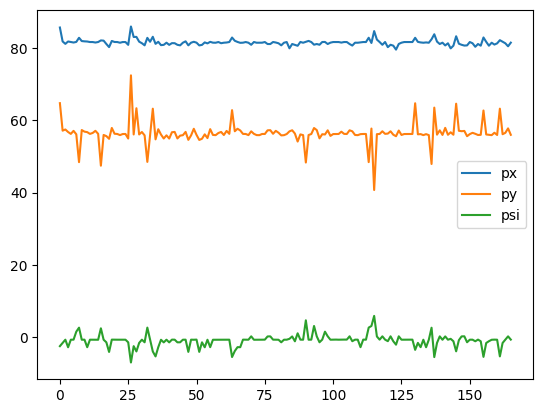

In [23]:
# plot the data
import matplotlib.pyplot as plt
# plot the pxlist,pylist,psilist against time
plt.plot(pxList,label='px')
plt.plot(pyList,label='py')
plt.plot(psiList,label='psi')
plt.legend()
plt.show()




In [1]:
#generated code might be wortj looking into

# for every timestamp iterate over the number of BarcodeData
for timestamp in df['timestamp'].unique():
   #for each timestamp iterate over the number of BarcodeData
   for barcodeData in df[df['timestamp'] == timestamp]['barcodeData'].unique():
      print(timestamp, barcodeData)
      #form jacobian matrix
      J = np.zeros((2,3))
      #get the barcodeData
      barcode = df[df['barcodeData'] == barcodeData]
      #get the number of rows
      rows = barcode.shape[0]
      #get the number of columns
      cols = barcode.shape[1]
      #for each row
      for row in range(rows):
          #for each column
          for col in range(cols):
              #get the values
              s_x = barcode.iloc[row]['s_x']
              s_y = barcode.iloc[row]['s_y']
              p_x = barcode.iloc[row]['c_x']
              p_y = barcode.iloc[row]['c_y']
              phi = barcode.iloc[row]['perceived_direction']
              #get the partial derivative
              J = partialDerivative(s_x,s_y,p_x,p_y,phi)
              #get the function
              f = getFunction(s_x,s_y,p_x,p_y,phi)
              #get the inverse of the jacobian
              J_inv = np.linalg.inv(J)
              #get the delta
              delta = np.dot(J_inv,f)
              #get the new values
              s_x = s_x + delta[0]
              s_y = s_y + delta[1]
              phi = phi + delta[2]
              #update the values
              barcode.iloc[row]['s_x'] = s_x
              barcode.iloc[row]['s_y'] = s_y
              barcode.iloc[row]['perceived_direction'] = phi


      
         #for each timestamp and barcodeData, get the 

   
    


NameError: name 'df' is not defined